In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

The focus naturally will be on the data engineering part.
Upload your slides on Moodle before the course starts.
These will be graded by the lecturers.
Present the data structure, important features and give statistics on data quality (missings, correlations, distributions etc.)
Since the students will be scambled, also include one short slide that introduces the topic.
Again, keep the presentation short (5-10 minutes).
Also upload the (commented!) notebook as PDF with output (!). This will be graded by your supervisor.

## Dataset

Each file contains the data from experimental testing from one cell throughout that cell’s life. The experimental protocols, further explanation of which can be found in the above paper, are summarized below:


| **File Name** | **Description**                                           |
|----------------|-----------------------------------------------------------|
| **VAH01.csv**  | Baseline                                                  |
| **VAH02.csv**  | Extended cruise (1000 sec)                                |
| **VAH05.csv**  | 10% power reduction during discharge (flight)             |
| **VAH06.csv**  | CC charge current reduced to C/2                          |
| **VAH07.csv**  | CV charge voltage reduced to 4.0 V                        |
| **VAH09.csv**  | Thermal chamber temperature of 20 °C                      |
| **VAH10.csv**  | Thermal chamber temperature of 30 °C                      |
| **VAH11.csv**  | 20% power reduction during discharge (flight)             |
| **VAH12.csv**  | Short cruise length (400 sec)                             |
| **VAH13.csv**  | Short cruise length (600 sec)                             |
| **VAH15.csv**  | Extended cruise (1000 sec)                                |
| **VAH16.csv**  | CC charge current reduced to 1.5 C                        |
| **VAH17.csv**  | Baseline                                                  |
| **VAH20.csv**  | Charge current reduced to 1.5 C                           |
| **VAH22.csv**  | Extended cruise (1000 sec)                                |
| **VAH23.csv**  | CV charge voltage reduced to 4.1 V                        |
| **VAH24.csv**  | CC charge current reduced to C/2                          |
| **VAH25.csv**  | Thermal chamber temperature of 20 °C                      |
| **VAH26.csv**  | Short cruise length (600 sec)                             |
| **VAH27.csv**  | Baseline                                                  |
| **VAH28.csv**  | 10% power reduction during discharge (flight)             |
| **VAH30.csv**  | Thermal chamber temperature of 35 °C                      |


## Variables

| **Variable**           | **Description**                                                                 |
|-------------------------|---------------------------------------------------------------------------------|
| **time_s**              | Time since beginning of experiment in seconds                                   |
| **Ecell_V**             | Cell Voltage                                                                    |
| **I_mA**                | Cell current in milliamperes                                                    |
| **EnergyCharge_W_h**    | Amount of energy supplied to the cell during charge in watt-hours               |
| **QCharge_mA_h**        | Amount of charge supplied to the cell during charge in milliampere-hours        |
| **EnergyDischarge_W_h** | Amount of energy extracted from the cell during discharge in watt-hours         |
| **QDischarge_mA_h**     | Amount of charge extracted from the cell during discharge in milliampere-hours  |
| **Temperature__C**      | Cell surface temperature in degrees Celsius                                     |
| **cycleNumber**         | Cycle number as recorded by the cell tester (see above note)                    |
| **Ns**                  | Cycle segment (varies, useful for discerning between segments)                  |


In [1]:
import pandas as pd

df = pd.read_csv("../data/VAH01.csv")



In [2]:
df.head()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
0,0.000000,3.538717,1491.3828,0.000000,0.000000,0.0,0.0,21.139246,0,0
1,10.000000,3.545570,1492.1708,0.014693,4.144108,0.0,0.0,21.115524,0,0
2,20.000001,3.549980,1491.5797,0.029405,8.288285,0.0,0.0,21.305294,0,0
3,30.000001,3.553131,1492.3679,0.044130,12.432512,0.0,0.0,21.574135,0,0
4,40.000002,3.555572,1490.9886,0.058865,16.576689,0.0,0.0,21.510880,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091477 entries, 0 to 1091476
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   time_s               1091477 non-null  float64
 1   Ecell_V              1091477 non-null  float64
 2   I_mA                 1091477 non-null  float64
 3   EnergyCharge_W_h     1091477 non-null  float64
 4   QCharge_mA_h         1091477 non-null  float64
 5   EnergyDischarge_W_h  1091477 non-null  float64
 6   QDischarge_mA_h      1091477 non-null  float64
 7   Temperature__C       1091477 non-null  float64
 8   cycleNumber          1091477 non-null  int64  
 9   Ns                   1091477 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 83.3 MB


In [16]:
df.describe()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
count,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06
mean,2.135044e+06,3.715903e+00,-2.279909e+03,6.999939e+00,1.958083e+02,-3.981751e+00,1.081291e+03,2.936995e+01,7.794272e+01,4.988582e+00
std,1.733081e+06,2.865061e-01,4.295483e+03,1.159419e+00,5.260892e+02,2.717832e+00,7.465300e+02,5.718766e+00,7.832924e+01,2.008390e+00
min,0.000000e+00,2.499993e+00,-2.162262e+04,0.000000e+00,0.000000e+00,-1.126279e+01,0.000000e+00,1.998481e+01,0.000000e+00,0.000000e+00
25%,8.079988e+05,3.609171e+00,-4.206342e+03,7.044381e+00,0.000000e+00,-6.262286e+00,4.374040e+02,2.499791e+01,3.000000e+00,5.000000e+00
50%,1.671703e+06,3.687619e+00,-6.099977e+02,7.127179e+00,0.000000e+00,-4.037409e+00,1.065582e+03,2.910961e+01,5.400000e+01,5.000000e+00
75%,3.158005e+06,3.874168e+00,0.000000e+00,7.196585e+00,0.000000e+00,-1.645630e+00,1.759669e+03,3.144220e+01,1.410000e+02,7.000000e+00
max,6.370155e+06,4.200207e+00,2.995802e+03,1.176882e+01,3.027442e+03,0.000000e+00,3.089338e+03,6.794930e+01,2.490000e+02,9.000000e+00


In [17]:
# Option 2: Print each column name on a new line
for col in df.columns:
    print(col)


time_s
Ecell_V
I_mA
EnergyCharge_W_h
QCharge_mA_h
EnergyDischarge_W_h
QDischarge_mA_h
Temperature__C
cycleNumber
Ns


--- README.txt (first 2000 chars) ---


PermissionError: [Errno 13] Permission denied: '..\\data'

In [13]:
# Inventory of files
vah_files = sorted(DATA_DIR.glob('VAH*.csv'))

def inventory_table(paths, n=20):
    return pd.DataFrame({
        'file': [p.name for p in paths],
        'size_mb': [round(p.stat().st_size/1024**2, 2) for p in paths]
    }).sort_values('size_mb', ascending=False).head(n)

display(inventory_table(vah_files, n=20))


Found 43 VAH CSVs, 21 impedance CSVs


,file,size_mb
14,VAH11.csv,131.94
16,VAH12.csv,127.11
0,VAH01.csv,105.75
2,VAH02.csv,97.66
4,VAH05.csv,96.85
12,VAH10.csv,90.66
6,VAH06.csv,76.79
39,VAH28.csv,73.79
36,VAH26.csv,68.75
10,VAH09.csv,65.57


In [14]:
# Build a cross-file sample
SAMPLE_PER_FILE = 100_000
MAX_FILES = 8
samples = []
for p in vah_files[:MAX_FILES]:
    try:
        dfp = pd.read_csv(p, nrows=SAMPLE_PER_FILE)
        dfp['source'] = p.stem
        samples.append(dfp)
    except Exception as e:
        print('Skip', p.name, '->', e)
sample = pd.concat(samples, ignore_index=True) if samples else None
print('Sample shape:', None if sample is None else sample.shape)


Sample shape: (400080, 16)


In [15]:
# Missingness table (text)
if sample is not None and not sample.empty:
    miss = sample.isna().mean().sort_values(ascending=False) * 100
    print('Missingness (% of sample):')
    print(miss.to_string())
else:
    print('No sample available for missingness')


Missingness (% of sample):
20%_30_second          99.980004
60%_1_second           99.980004
60%_30_second          99.980004
cycle numbers          99.980004
20%_1_second           99.980004
time_s                  0.019996
I_mA                    0.019996
Ecell_V                 0.019996
Temperature__C          0.019996
QDischarge_mA_h         0.019996
EnergyDischarge_W_h     0.019996
QCharge_mA_h            0.019996
EnergyCharge_W_h        0.019996
cycleNumber             0.019996
Ns                      0.019996
source                  0.000000


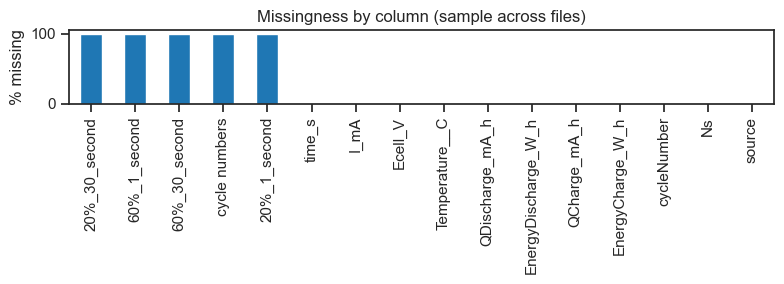

In [16]:
# Missingness bar plot
if sample is not None and not sample.empty:
    miss = sample.isna().mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(8, 3))
    miss.plot(kind='bar', color='tab:blue')
    plt.ylabel('% missing')
    plt.title('Missingness by column (sample across files)')
    plt.tight_layout()
    plt.show()
else:
    print('No sample available for missingness plot')


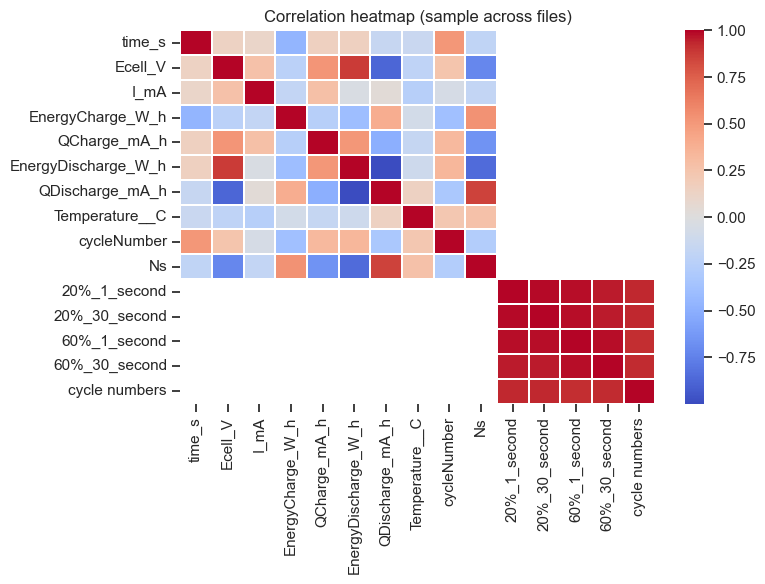

In [17]:
# Correlation heatmap
if sample is not None and not sample.empty:
    num_cols = sample.select_dtypes(include='number').columns
    corr = sample[num_cols].corr(numeric_only=True)
    if sns is not None:
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.2)
        plt.title('Correlation heatmap (sample across files)')
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
        plt.xticks(range(len(num_cols)), num_cols, rotation=90)
        plt.yticks(range(len(num_cols)), num_cols)
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.title('Correlation heatmap (sample across files)')
        plt.tight_layout()
        plt.show()
else:
    print('No sample available for correlation')


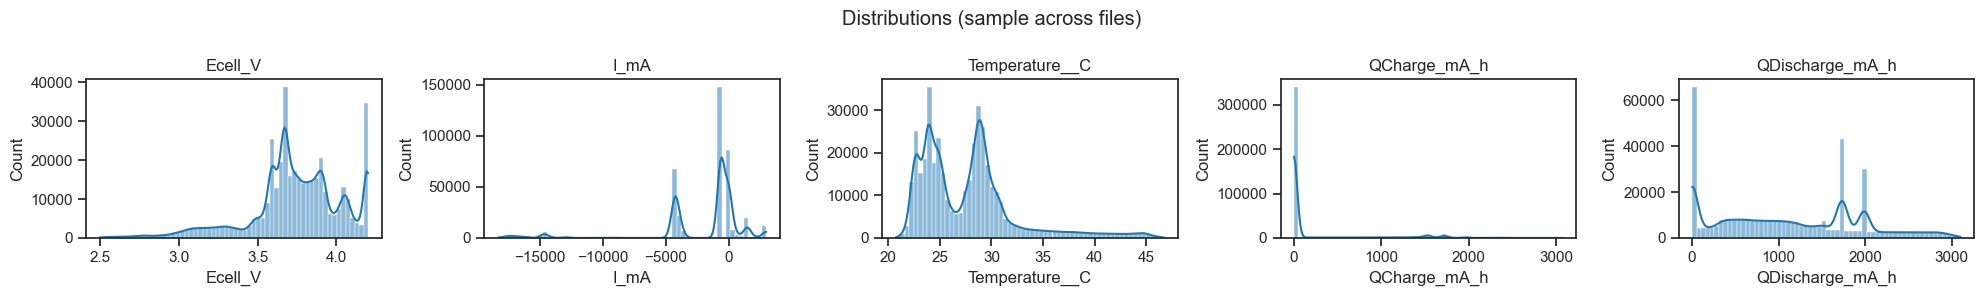

In [18]:
# Distributions for key columns
if sample is not None and not sample.empty:
    cols_to_plot = [c for c in ['Ecell_V','I_mA','Temperature__C','QCharge_mA_h','QDischarge_mA_h'] if c in sample.columns]
    if cols_to_plot:
        fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(4*len(cols_to_plot), 3))
        if len(cols_to_plot) == 1:
            axes = [axes]
        for ax, c in zip(axes, cols_to_plot):
            s = sample[c].replace([np.inf, -np.inf], np.nan).dropna()
            if sns is not None:
                sns.histplot(s, ax=ax, kde=True, bins=60, color='tab:blue')
            else:
                ax.hist(s, bins=60, color='tab:blue', alpha=0.85)
            ax.set_title(c)
        plt.suptitle('Distributions (sample across files)')
        plt.tight_layout()
        plt.show()
    else:
        print('No numeric columns to plot')
else:
    print('No sample available for distributions')


In [19]:
# Select target file and prepare downsampled data
target = None
for name in ['VAH01.csv','VAH17.csv','VAH27.csv']:
    p = DATA_DIR / name
    if p.exists():
        target = p
        break
if target is None:
    target = vah_files[0] if len(vah_files) > 0 else None
if target is not None:
    print(f'Using {target.name} for detailed plots')
    cols = ['time_s','Ecell_V','I_mA','Temperature__C','QCharge_mA_h','QDischarge_mA_h','cycleNumber','Ns']
    available = pd.read_csv(target, nrows=0).columns.tolist()
    usecols = [c for c in cols if c in available]
    df_full = pd.read_csv(target, usecols=usecols)
    step = max(1, len(df_full)//200_000)
    d = df_full.iloc[::step].copy()
else:
    print('No VAH files found for detailed analysis')


Using VAH01.csv for detailed plots


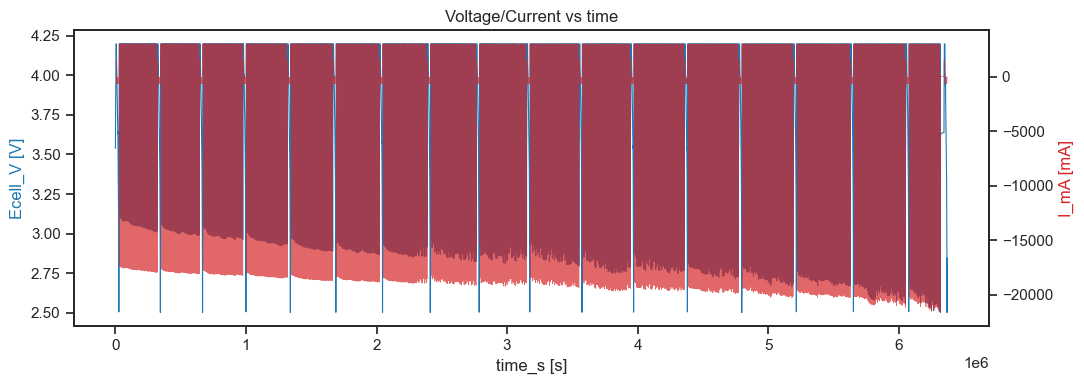

In [20]:
# Voltage and current over time
if 'd' in globals() and not d.empty:
    fig, ax1 = plt.subplots(figsize=(11, 4))
    if 'Ecell_V' in d:
        ax1.plot(d['time_s'], d['Ecell_V'], color='tab:blue', lw=0.8)
        ax1.set_ylabel('Ecell_V [V]', color='tab:blue')
    ax1.set_xlabel('time_s [s]')
    ax2 = ax1.twinx()
    if 'I_mA' in d:
        ax2.plot(d['time_s'], d['I_mA'], color='tab:red', lw=0.5, alpha=0.7)
        ax2.set_ylabel('I_mA [mA]', color='tab:red')
    plt.title('Voltage/Current vs time')
    plt.tight_layout()
    plt.show()
else:
    print('No data prepared for time-series plot')


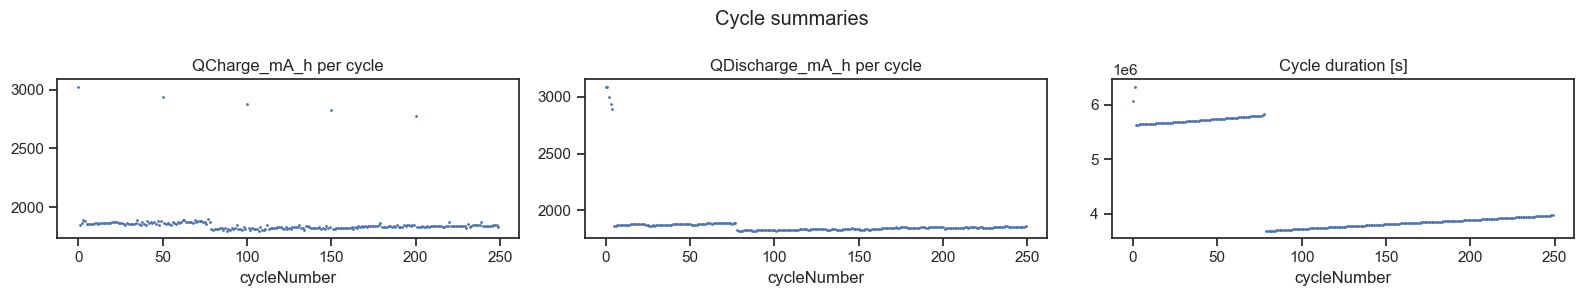

In [21]:
# Per-cycle summaries (capacity, duration)
if 'df_full' in globals() and not df_full.empty and 'cycleNumber' in df_full:
    agg = {}
    if 'QCharge_mA_h' in df_full.columns:
        agg['QCharge_mA_h'] = 'max'
    if 'QDischarge_mA_h' in df_full.columns:
        agg['QDischarge_mA_h'] = 'max'
    agg['time_s'] = ['min','max']
    cyc = df_full.groupby('cycleNumber').agg(agg)
    cyc.columns = ['_'.join(t) if isinstance(t, tuple) else t for t in cyc.columns]
    cyc['duration_s'] = cyc['time_s_max'] - cyc['time_s_min']
    nplots = 1 + int('QCharge_mA_h_max' in cyc) + int('QDischarge_mA_h_max' in cyc)
    fig, axes = plt.subplots(1, nplots, figsize=(4*nplots + 4, 3))
    if nplots == 1:
        axes = [axes]
    idx = 0
    if 'QCharge_mA_h_max' in cyc:
        axes[idx].plot(cyc.index, cyc['QCharge_mA_h_max'], '.', ms=2)
        axes[idx].set_title('QCharge_mA_h per cycle')
        idx += 1
    if 'QDischarge_mA_h_max' in cyc:
        axes[idx].plot(cyc.index, cyc['QDischarge_mA_h_max'], '.', ms=2)
        axes[idx].set_title('QDischarge_mA_h per cycle')
        idx += 1
    axes[idx].plot(cyc.index, cyc['duration_s'], '.', ms=2)
    axes[idx].set_title('Cycle duration [s]')
    for a in axes:
        a.set_xlabel('cycleNumber')
    plt.suptitle('Cycle summaries')
    plt.tight_layout()
    plt.show()
else:
    print('No df_full/cycleNumber for cycle summary')


In [22]:
# Simple anomaly checks
if 'df_full' in globals() and not df_full.empty:
    rep = {}
    if 'time_s' in df_full:
        rep['time_non_monotonic'] = int((df_full['time_s'].diff() < 0).sum())
    if 'Ecell_V' in df_full:
        rep['Ecell_V_out_of_[2.5,4.3]V'] = int(((df_full['Ecell_V'] < 2.5) | (df_full['Ecell_V'] > 4.3)).sum())
    if 'Temperature__C' in df_full:
        rep['Temperature_out_of_[0,70]C'] = int(((df_full['Temperature__C'] < 0) | (df_full['Temperature__C'] > 70)).sum())
    print('Anomalies:', rep)
else:
    print('No df_full for anomaly report')


Anomalies: {'time_non_monotonic': 0, 'Ecell_V_out_of_[2.5,4.3]V': 3, 'Temperature_out_of_[0,70]C': 0}


In [26]:
# Extract charging segments and label CC/CV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assert 'df_full' in globals(), 'Run the target selection cell first (eda_select_target_split)'
req = {'time_s','Ecell_V','I_mA','QCharge_mA_h','Temperature__C','cycleNumber'}
missing = [r for r in req if r not in df_full.columns]
assert not missing, f'Missing columns for charge analysis: {missing}'
dfc = df_full.copy()
dfc['dt'] = dfc.groupby('cycleNumber')['time_s'].diff()
dfc['dQ'] = dfc.groupby('cycleNumber')['QCharge_mA_h'].diff()
charge_mask = (dfc['I_mA'] > 10) & (dfc['dt'].fillna(0) >= 0) & (dfc['dQ'].fillna(0) >= 0)
chg = dfc[charge_mask].copy()
# Global CV threshold based on top voltage during charge
vmax = np.nanpercentile(chg['Ecell_V'], 99.9) if len(chg) else np.nan
dv = 0.05
v_cv_thr = vmax - dv if np.isfinite(vmax) else 4.15
chg['phase'] = np.where(chg['Ecell_V'] >= v_cv_thr, 'CV', 'CC')
# Mark CV start per cycle
def cv_start_time(g):
    idxs = np.where(g['phase'].values=='CV')[0]
    return g['time_s'].values[int(idxs[0])] if len(idxs)>0 else np.nan
cv_start = chg.groupby('cycleNumber').apply(cv_start_time).rename('t_cv_start')
chg = chg.merge(cv_start, on='cycleNumber', how='left')
print('Charge rows:', chg.shape, 'V_cv_thr=', round(v_cv_thr,3))
# Persist for later cells
df_charge = chg


Charge rows: (128667, 12) V_cv_thr= 4.15


C:\Users\Admin\AppData\Local\Temp\ipykernel_33240\1188160954.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cv_start = chg.groupby('cycleNumber').apply(cv_start_time).rename('t_cv_start')


In [27]:
# Compute per-cycle charging metrics
import numpy as np
assert 'df_charge' in globals(), 'Run charge_extract_split first'
def metrics_for_cycle(g):
    out = {}
    # durations
    dt = g['dt'].fillna(0)
    out['charge_time_s'] = float((g['time_s'].iloc[-1] - g['time_s'].iloc[0])) if len(g)>1 else np.nan
    out['cc_duration_s'] = float(dt[g['phase']=='CC'].sum())
    out['cv_duration_s'] = float(dt[g['phase']=='CV'].sum())
    # currents
    out['cc_avg_I_mA'] = float(g.loc[g['phase']=='CC','I_mA'].mean()) if (g['phase']=='CC').any() else np.nan
    out['cv_end_I_mA'] = float(g['I_mA'].iloc[-1])
    # volt/capacity/energy
    out['V_max'] = float(g['Ecell_V'].max())
    out['capacity_mAh'] = float(g['QCharge_mA_h'].iloc[-1] - g['QCharge_mA_h'].iloc[0])
    out['energy_Wh'] = float((g['EnergyCharge_W_h'].iloc[-1] - g['EnergyCharge_W_h'].iloc[0]) if 'EnergyCharge_W_h' in g else np.nan)
    # temperature
    out['temp_mean_C'] = float(g['Temperature__C'].mean())
    out['temp_peak_C'] = float(g['Temperature__C'].max())
    # CC slope dV/dt
    gcc = g[g['phase']=='CC']
    if len(gcc) > 10:
        try:
            m, b = np.polyfit(gcc['time_s'].values, gcc['Ecell_V'].values, 1)
            out['cc_dVdt_V_per_s'] = float(m)
        except Exception:
            out['cc_dVdt_V_per_s'] = np.nan
    else:
        out['cc_dVdt_V_per_s'] = np.nan
    # CV start capacity
    gcv = g[g['phase']=='CV']
    out['Q_at_cv_start_mAh'] = float(gcv['QCharge_mA_h'].iloc[0] - g['QCharge_mA_h'].iloc[0]) if len(gcv)>0 else np.nan
    return out
cols_keep = ['time_s','dt','I_mA','Ecell_V','QCharge_mA_h','Temperature__C','phase'] + (['EnergyCharge_W_h'] if 'EnergyCharge_W_h' in df_charge.columns else [])
feat = df_charge[cols_keep + ['cycleNumber']].groupby('cycleNumber', sort=True).apply(metrics_for_cycle)
chg_feat = pd.DataFrame.from_dict(feat.to_dict(), orient='index').sort_index()
chg_feat.index.name = 'cycleNumber'
print('Charging metrics shape:', chg_feat.shape)
display(chg_feat.head())


Charging metrics shape: (250, 12)


C:\Users\Admin\AppData\Local\Temp\ipykernel_33240\3385706819.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat = df_charge[cols_keep + ['cycleNumber']].groupby('cycleNumber', sort=True).apply(metrics_for_cycle)


,charge_time_s,cc_duration_s,cv_duration_s,cc_avg_I_mA,cv_end_I_mA,V_max,capacity_mAh,energy_Wh,temp_mean_C,temp_peak_C,cc_dVdt_V_per_s,Q_at_cv_start_mAh
cycleNumber,,,,,,,,,,,,
0,6.060350e+06,5.945415e+06,29094.814294,1726.916922,52.175129,4.200128,1890.861928,NaN,25.776919,31.979885,5.239626e-09,1827.254619
1,6.318861e+06,6.227889e+06,24290.135951,1684.946655,71.876640,4.200168,1601.931962,NaN,26.221151,32.217098,-1.396901e-09,1046.715897
2,5.633860e+06,5.551007e+06,20139.881613,1729.731916,116.205520,4.200168,1830.063822,NaN,26.555328,32.217098,-7.551387e-09,1046.787030
3,5.635873e+06,5.552822e+06,20922.451718,1728.637424,103.399380,4.200049,1826.649913,NaN,26.802931,32.161751,-8.164906e-09,1071.700052
4,5.637668e+06,5.554911e+06,21250.129779,1728.242046,109.112950,4.200089,1826.415554,NaN,26.828906,32.304077,-7.498186e-09,1046.734130


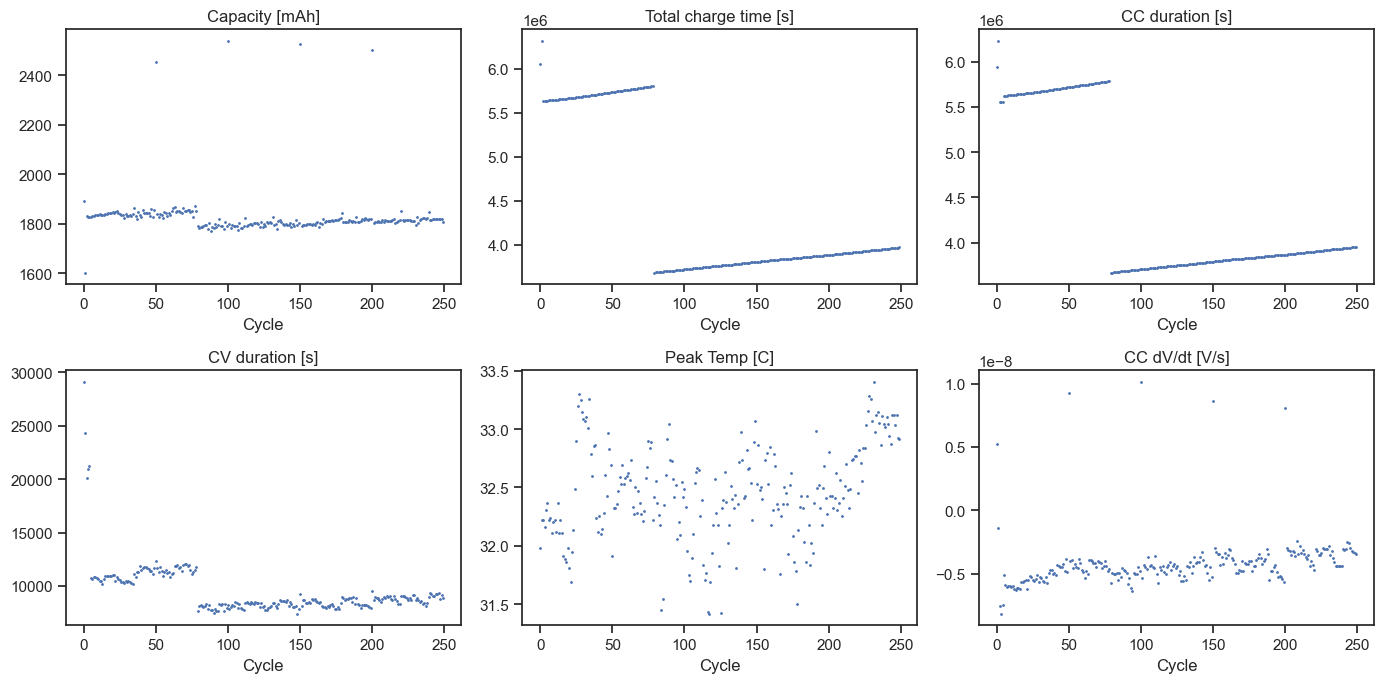

In [28]:
# Plot key charging metrics vs cycle
assert 'chg_feat' in globals(), 'Run charge_metrics_split first'
import matplotlib.pyplot as plt
cols = ['capacity_mAh','charge_time_s','cc_duration_s','cv_duration_s','temp_peak_C','cc_dVdt_V_per_s']
labels = ['Capacity [mAh]','Total charge time [s]','CC duration [s]','CV duration [s]','Peak Temp [C]','CC dV/dt [V/s]']
fig, axes = plt.subplots(2, 3, figsize=(14,7))
axes = axes.ravel()
x = chg_feat.index.values
for i,(c,lbl) in enumerate(zip(cols,labels)):
    if c in chg_feat:
        axes[i].plot(x, chg_feat[c], '.', ms=2)
        axes[i].set_title(lbl)
        axes[i].set_xlabel('Cycle')
fig.tight_layout(); plt.show()


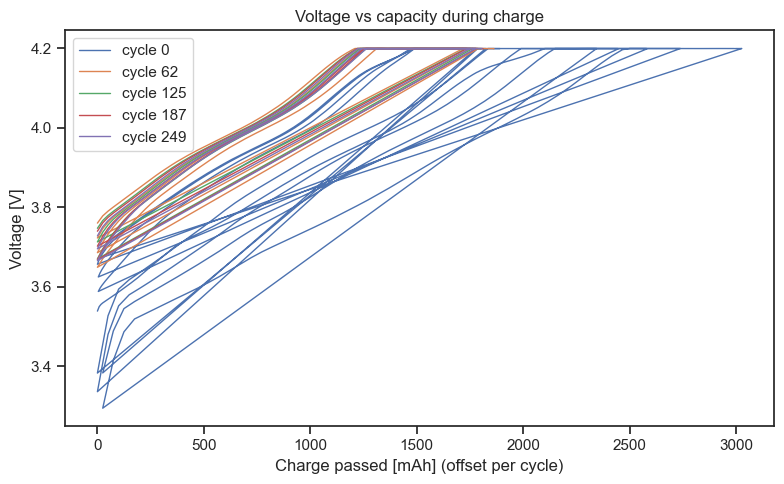

In [29]:
# Overlay voltage vs capacity curves for selected cycles
assert 'df_charge' in globals(), 'Run charge_extract_split first'
cycs = sorted(df_charge['cycleNumber'].unique())
if len(cycs) == 0:
    print('No charge cycles found')
else:
    picks = sorted(set([cycs[0], cycs[max(0,len(cycs)//4)], cycs[len(cycs)//2], cycs[min(len(cycs)-1,3*len(cycs)//4)], cycs[-1]]))
    plt.figure(figsize=(8,5))
    for c in picks:
        g = df_charge[df_charge['cycleNumber']==c]
        step = max(1, len(g)//2000)
        g = g.iloc[::step]
        q0 = g['QCharge_mA_h'].iloc[0]
        plt.plot(g['QCharge_mA_h']-q0, g['Ecell_V'], lw=1, label=f'cycle {c}')
    plt.xlabel('Charge passed [mAh] (offset per cycle)')
    plt.ylabel('Voltage [V]')
    plt.title('Voltage vs capacity during charge')
    plt.legend()
    plt.tight_layout(); plt.show()


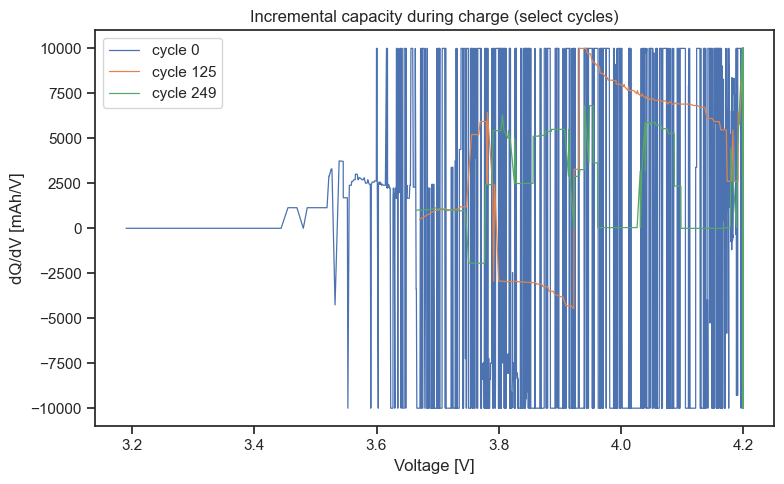

In [30]:
# Incremental capacity analysis dQ/dV during charge
import numpy as np, pandas as pd
assert 'df_charge' in globals(), 'Run charge_extract_split first'
def dq_dv_curve(g):
    v = g['Ecell_V'].values
    q = g['QCharge_mA_h'].values
    order = np.argsort(v)
    v = v[order]; q = q[order]
    dv = np.gradient(v)
    dq = np.gradient(q)
    with np.errstate(divide='ignore', invalid='ignore'):
        ic = dq / dv
    ic = pd.Series(ic).rolling(11, min_periods=1, center=True).median().values
    return v, ic
cycs = sorted(df_charge['cycleNumber'].unique())
picks = sorted(set([cycs[0], cycs[len(cycs)//2], cycs[-1]])) if len(cycs)>=3 else cycs
plt.figure(figsize=(8,5))
for c in picks:
    g = df_charge[df_charge['cycleNumber']==c]
    step = max(1, len(g)//4000)
    g = g.iloc[::step]
    v, ic = dq_dv_curve(g)
    ic = np.clip(ic, -1e4, 1e4)
    plt.plot(v, ic, lw=0.9, label=f'cycle {c}')
plt.xlabel('Voltage [V]')
plt.ylabel('dQ/dV [mAh/V]')
plt.title('Incremental capacity during charge (select cycles)')
plt.legend()
plt.tight_layout(); plt.show()


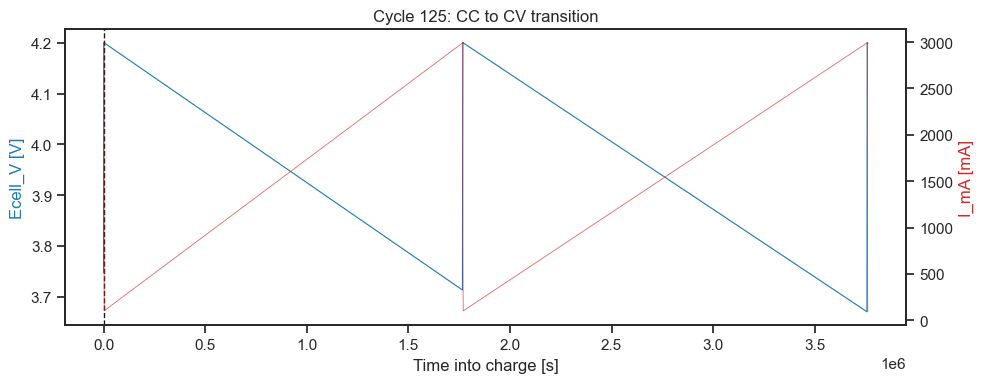

In [31]:
# Show CC->CV transition on a representative cycle
import numpy as np
assert 'df_charge' in globals(), 'Run charge_extract_split first'
cycs = sorted(df_charge['cycleNumber'].unique())
mid = cycs[len(cycs)//2] if cycs else None
if mid is None:
    print('No cycles available')
else:
    g = df_charge[df_charge['cycleNumber']==mid]
    t = g['time_s'] - g['time_s'].iloc[0]
    fig, ax1 = plt.subplots(figsize=(10,4))
    ax1.plot(t, g['Ecell_V'], color='tab:blue', lw=0.8)
    ax1.set_ylabel('Ecell_V [V]', color='tab:blue')
    ax1.set_xlabel('Time into charge [s]')
    ax2 = ax1.twinx()
    ax2.plot(t, g['I_mA'], color='tab:red', lw=0.6, alpha=0.7)
    ax2.set_ylabel('I_mA [mA]', color='tab:red')
    if np.isfinite(g['t_cv_start'].iloc[0]):
        t0 = g['t_cv_start'].iloc[0] - g['time_s'].iloc[0]
        ax1.axvline(t0, color='k', ls='--', lw=1, label='CV start')
    plt.title(f'Cycle {mid}: CC to CV transition')
    fig.tight_layout(); plt.show()


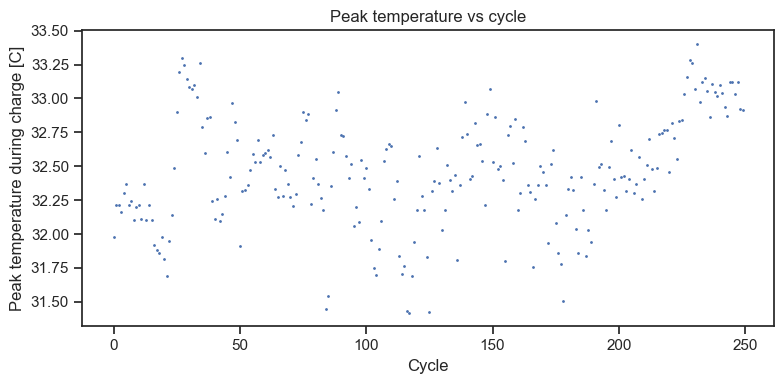

In [32]:
# Temperature vs cycle during charge
assert 'chg_feat' in globals(), 'Run charge_metrics_split first'
plt.figure(figsize=(8,4))
plt.plot(chg_feat.index, chg_feat['temp_peak_C'], '.', ms=2)
plt.xlabel('Cycle')
plt.ylabel('Peak temperature during charge [C]')
plt.title('Peak temperature vs cycle')
plt.tight_layout(); plt.show()
